In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sympy import * 
#from spring_damp import force_time, mass_damp_spring, ideal_actual, graphs
from haptic import haptic_class
import random
import yaml 
random.seed(49) 

with open('Human_Auto.yaml') as File:
    d = yaml.load(File, Loader=yaml.FullLoader)
#can't give negative sin as input to function
hap = haptic_class(dic = d, Theta_h = cos, Theta_a= sin) 

Text(0.5, 1.0, 'Human_angular_disp_vel_acc')

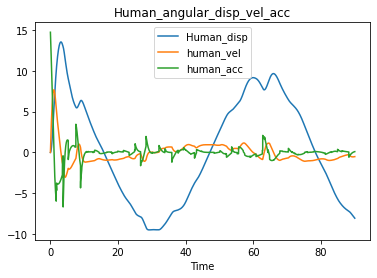

In [2]:
plt.plot(hap.Theta['H_time'], hap._vector[:,0] ) 
plt.plot(hap.Theta['H_time'], hap._vector[:,1] )
plt.plot(hap.Theta['H_time'], hap.acc_sw) 
plt.xlabel('Time')
plt.legend(['Human_disp', 'human_vel', 'human_acc']) 
plt.title('Human_angular_disp_vel_acc') 

Text(0.5, 1.0, 'Auto_angular_disp_vel_acc')

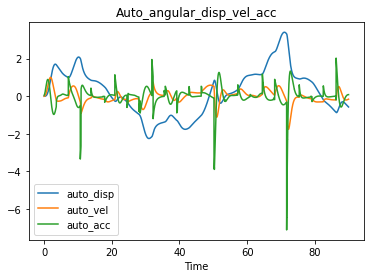

In [3]:
plt.plot(hap.Theta['A_time'],hap._vector[:,2] ) 
plt.plot(hap.Theta['A_time'],hap._vector[:,3] )
plt.plot(hap.Theta['H_time'], hap.acc_s) 
plt.xlabel('Time')
plt.legend(['auto_disp', 'auto_vel', 'auto_acc']) 
plt.title('Auto_angular_disp_vel_acc')

Text(0.5, 1.0, 'ERROR')

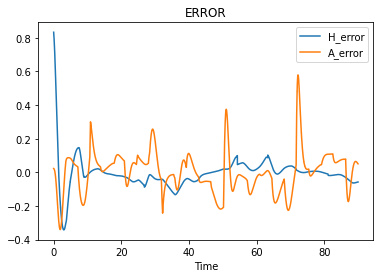

In [4]:
plt.plot(hap.Theta['H_time'],hap.error[:, 0] ) 
plt.plot(hap.Theta['A_time'],hap.error[:,1] )
#plt.plot(hap.Theta['H_time'], hap.acc_a) 
plt.xlabel('Time')
plt.legend(['H_error', 'A_error']) 
plt.title('ERROR')

In [5]:
df = hap.dataframe()

In [6]:
df.to_csv('haptic_sim_1.csv', index=False)  

In [7]:
df = pd.read_csv('haptic_sim_1.csv') 
df

,time_step_H,time_step_A,theta_H,theta_A,H_spring,A_spring,H_damp,A_damp,H_mass,A_mass,disp_sw,disp_s,vel_sw,vel_s,acc_sw,acc_s,error_1,error_2
0,0.00,0.00,10.000000,0.000000,8.842122,4.344843,4.623523,1.251697,1,4,0.000000,0.000000,0.000000,0.000000,14.736871,0.057771,0.833333,0.023077
1,0.01,0.01,9.999995,0.001000,8.842122,4.344843,4.623523,1.251697,1,4,0.000735,0.000003,0.146798,0.000576,14.621767,0.059493,0.830808,0.022891
2,0.02,0.02,9.999980,0.002000,8.842122,4.344843,4.623523,1.251697,1,4,0.002932,0.000012,0.292438,0.001171,14.505143,0.061630,0.828180,0.022699
3,0.03,0.03,9.999955,0.003000,8.842122,4.344843,4.623523,1.251697,1,4,0.006580,0.000026,0.436904,0.001790,14.387031,0.064172,0.825450,0.022498
4,0.04,0.04,9.999920,0.004000,8.842122,4.344843,4.623523,1.251697,1,4,0.011666,0.000048,0.580182,0.002436,14.267461,0.067112,0.822618,0.022288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8996,89.96,89.96,-9.094745,0.415760,7.679085,3.816761,14.130542,2.362273,4,10,-8.042353,-0.564384,-0.518617,-0.159988,0.094443,0.085283,-0.057323,0.051871
8997,89.97,89.97,-9.098898,0.414850,7.679085,3.816761,14.130542,2.362273,4,10,-8.047535,-0.565979,-0.517656,-0.159127,0.095638,0.085339,-0.057267,0.051584
8998,89.98,89.98,-9.103042,0.413940,7.679085,3.816761,14.130542,2.362273,4,10,-8.052706,-0.567566,-0.516683,-0.158265,0.096815,0.085372,-0.057210,0.051296
8999,89.99,89.99,-9.107177,0.413029,7.679085,3.816761,14.130542,2.362273,4,10,-8.057868,-0.569145,-0.515698,-0.157403,0.097973,0.085381,-0.057154,0.051009


## Error_1

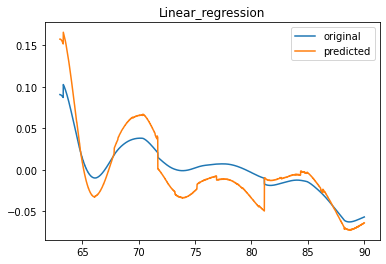

In [10]:
import warnings 
warnings.filterwarnings("ignore") 
import random 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
lr = LinearRegression()
rfr = RandomForestRegressor(max_depth = 5, n_estimators=100,random_state = 0 )
etr = ExtraTreesRegressor(max_depth = 5, n_estimators = 100, random_state = 0)
gbr = GradientBoostingRegressor(random_state = 0)

df_error_1 = df.iloc[:, :17]  
df_error_2 = df.iloc[:, :16] 
df_error_2['error_2'] = df['error_2'] 

X_train = df_error_1.iloc[:6302, :16]
y_train = df_error_1.iloc[:6302, 16]
X_test = df_error_1.iloc[6302:, :16] 
y_test = df_error_1.iloc[6302:, 16:]

def compare(z1, title): 
    plt.plot(X_test['time_step_H'], y_test['error_1'])
    plt.plot(X_test['time_step_H'], z1)
    plt.legend(['original', 'predicted'])
    plt.title(title) 

lr.fit(X_train, y_train)
z1 = lr.predict(X_test) 
compare(z1, "Linear_regression") 

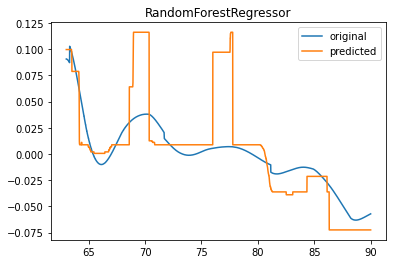

In [11]:
rfr.fit(X_train, y_train) 
z1 = rfr.predict(X_test) 
compare(z1, "RandomForestRegressor") 

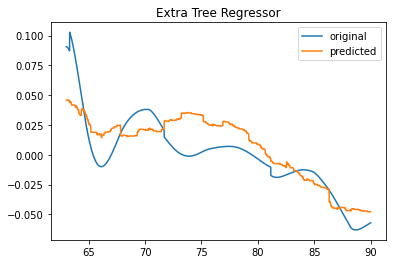

In [12]:
etr.fit(X_train, y_train)
z1 = etr.predict(X_test)  
compare(z1, "Extra Tree Regressor")

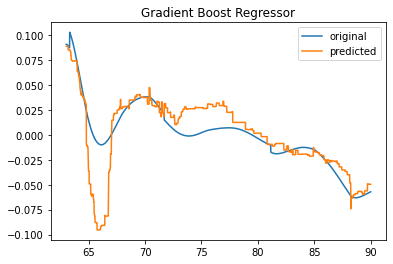

In [13]:
gbr.fit(X_train, y_train) 
z1 = gbr.predict(X_test) 
compare(z1, "Gradient Boost Regressor")

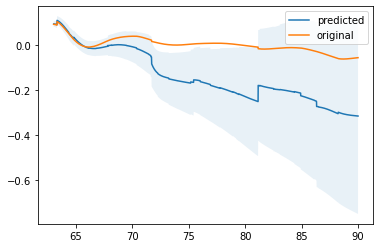

In [14]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

rbf = ConstantKernel(1.0, (1e-1, 1e3) ) * RBF(10, (1e-3, 1e3))

gpr = GaussianProcessRegressor(kernel=rbf, alpha=0.1, normalize_y=True) 

gpr.fit(X_train, y_train) 
params = gpr.kernel_.get_params() 
mu_s, cov_s = gpr.predict(X_test, return_cov=True) 

mu_s = mu_s.ravel()
std = 1.96 * np.sqrt(np.diag(cov_s)) 

plt.plot(X_test['time_step_H'], mu_s) 
plt.plot(X_test['time_step_H'], y_test)
plt.fill_between(X_test['time_step_H'], mu_s + std, mu_s - std, alpha = 0.1)
plt.legend(["predicted", "original"])  

## Error_2

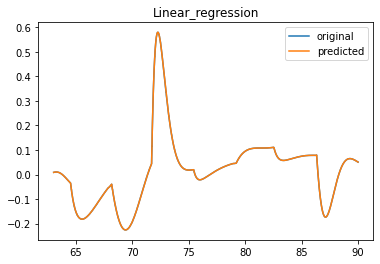

In [19]:
ss = StandardScaler()
lr = LinearRegression()
rfr = RandomForestRegressor(max_depth = 5, n_estimators=100,random_state = 0 )
etr = ExtraTreesRegressor(max_depth = 5, n_estimators = 100, random_state = 0)
gbr = GradientBoostingRegressor(random_state = 0) 

X_train = df_error_2.iloc[:6302, :16]
y_train = df_error_2.iloc[:6302, 16]
X_test = df_error_2.iloc[6302:, :16] 
y_test = df_error_2.iloc[6302:, 16:]

def compare(z1, title): 
    plt.plot(X_test['time_step_H'], y_test['error_2'])
    plt.plot(X_test['time_step_H'], z1)
    plt.legend(['original', 'predicted'])
    plt.title(title) 

lr.fit(X_train, y_train)
z1 = lr.predict(X_test) 
compare(z1, "Linear_regression")


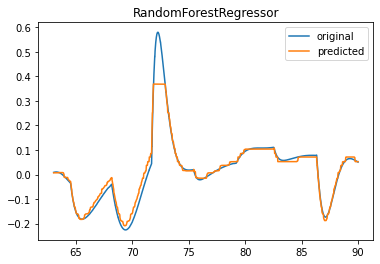

In [20]:
rfr.fit(X_train, y_train)
z1 = rfr.predict(X_test) 
compare(z1, "RandomForestRegressor") 

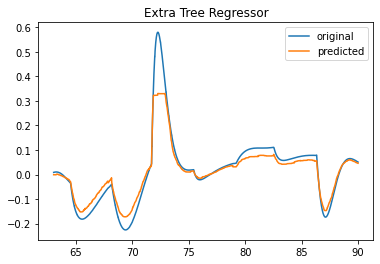

In [21]:
etr.fit(X_train, y_train)
z1 = etr.predict(X_test)  
compare(z1, "Extra Tree Regressor") 

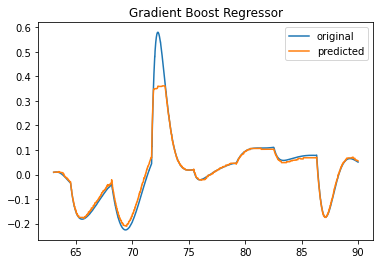

In [22]:
gbr.fit(X_train, y_train) 
z1 = gbr.predict(X_test) 
compare(z1, "Gradient Boost Regressor") 

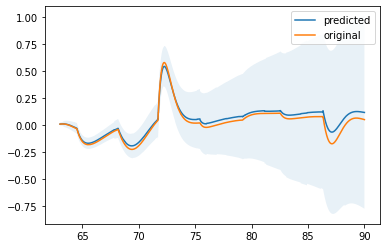

In [23]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

rbf = ConstantKernel(1.0, (1e-1, 1e3) ) * RBF(10, (1e-3, 1e3))

gpr = GaussianProcessRegressor(kernel=rbf, alpha=0.1, normalize_y=True) 

gpr.fit(X_train, y_train) 
params = gpr.kernel_.get_params() 
mu_s, cov_s = gpr.predict(X_test, return_cov=True) 

mu_s = mu_s.ravel()
std = 1.96 * np.sqrt(np.diag(cov_s)) 

plt.plot(X_test['time_step_H'], mu_s) 
plt.plot(X_test['time_step_H'], y_test)
plt.fill_between(X_test['time_step_H'], mu_s + std, mu_s - std, alpha = 0.1)
plt.legend(["predicted", "original"])   

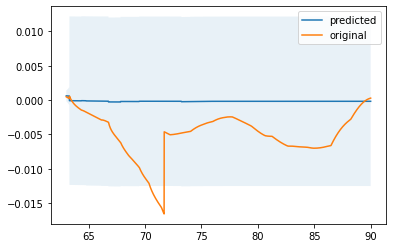

In [24]:
df = pd.read_csv('sim_1.csv') 

imp_colums = ["time_step", "force", "mass", "K", "B","actual_disp", "actual_vel", "actual_acc", "G(x)"]


for i in df.columns:
    if i not in imp_colums:
        df = df.drop([i], axis=1)

X_train = df.iloc[:6302, :8]
y_train = df.iloc[:6302, 8:]
X_test = df.iloc[6302:, :8]
y_test = df.iloc[6302:, 8:]

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

rbf = ConstantKernel(1.0, (1e-1, 1e3) ) * RBF(10, (1e-3, 1e3))

gpr = GaussianProcessRegressor(kernel=rbf, alpha=0.1, normalize_y = True) 

gpr.fit(X_train, y_train)
params = gpr.kernel_.get_params() 
mu_s, cov_s = gpr.predict(X_test, return_cov=True)

mu_s = mu_s.ravel()
std = 1.96 * np.sqrt(np.diag(cov_s)) 
plt.plot(X_test['time_step'], mu_s)
plt.plot(X_test['time_step'], y_test)
plt.fill_between(X_test['time_step'], mu_s + std, mu_s - std, alpha = 0.1)
plt.legend(["predicted", "original"]) 